In [27]:
#Perform EDA OF SECO DATA-1 and SECO DATA-2 (Satellite images data)
import numpy as np
import os
import glob
import rasterio
import glob
import sys  
sys.path.insert(0, '/home/akansh-i2sc/Desktop/Study/HLCV/Why-Self-Supervision-in-Time/src/modules')
import seco_dataset_temporal as seco
import matplotlib.pyplot as plt

In [14]:
path2data =  "/home/akansh-i2sc/Desktop/Study/HLCV/SeCo_dataset/seco_100k/seasonal_contrast_100k/"
dataset = seco.SeasonalContrastTemporal(root=path2data)

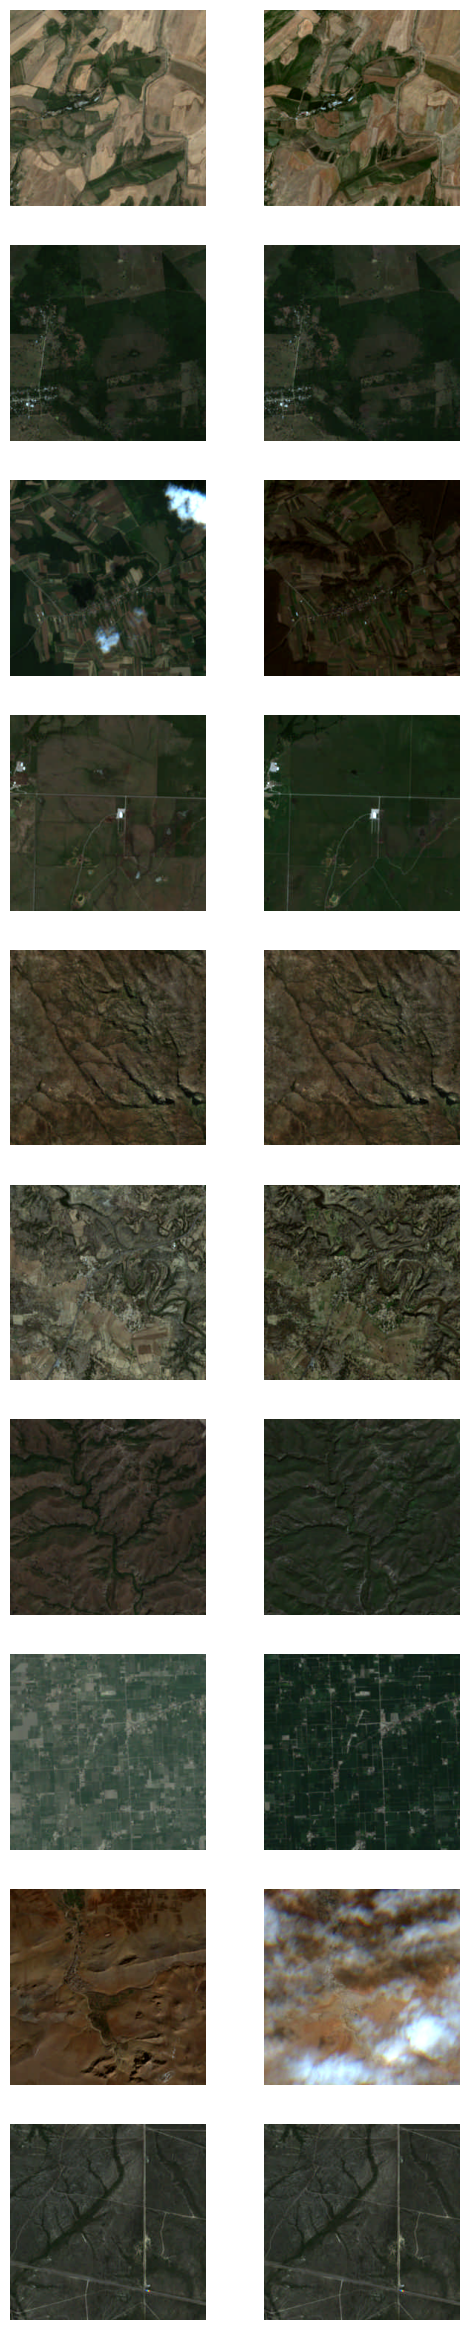

In [73]:
l = [9336, 19735, 7775, 5098, 10045, 642, 14899, 8342, 18868, 25]
plt.figure(figsize=(6, 30))
i = 1
for j in l:
    plt.subplot(10, 2, i)
    plt.imshow(dataset.__getitem__(j)[0])
    plt.axis('off')
    plt.subplot(10, 2, i+1)
    plt.imshow(dataset.__getitem__(j)[1])
    plt.axis('off')
    i += 2

In [74]:
len(dataset)

20000